In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import pandas as pd

In [0]:
spark = SparkSession.builder.appName("myapp").getOrCreate()

In [0]:
# Load the dataset into a DataFrame
df1 = spark.read.csv( "/FileStore/tables/twitter_data.csv", header=True, inferSchema=True)

# Show the first 10 rows of the DataFrame
df1.show(10)
     

+---+----------+----------------------------+--------+---------------+-------------------------------------------------------------------------------------------------------------------+
|  0|1467810369|Mon Apr 06 22:19:45 PDT 2009|NO_QUERY|_TheSpecialOne_|@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D|
+---+----------+----------------------------+--------+---------------+-------------------------------------------------------------------------------------------------------------------+
|  0|1467810672|        Mon Apr 06 22:19:...|NO_QUERY|  scotthamilton|                                                                                               is upset that he ...|
|  0|1467810917|        Mon Apr 06 22:19:...|NO_QUERY|       mattycus|                                                                                               @Kenichan I dived...|
|  0|1467811184|        Mon Apr 06 22:19:...|NO_QUERY|        Ell

In [0]:
#Shape of data
print(df1.count(),len(df1.columns))


1599999 6


In [0]:
#Defining Column names
new_columns = ['sentiment', 'id', 'date', 'query', 'username', 'text']
df2 = df1.toDF(*new_columns)
df2.show()

+---------+----------+--------------------+--------+---------------+--------------------+
|sentiment|        id|                date|   query|       username|                text|
+---------+----------+--------------------+--------+---------------+--------------------+
|        0|1467810672|Mon Apr 06 22:19:...|NO_QUERY|  scotthamilton|is upset that he ...|
|        0|1467810917|Mon Apr 06 22:19:...|NO_QUERY|       mattycus|@Kenichan I dived...|
|        0|1467811184|Mon Apr 06 22:19:...|NO_QUERY|        ElleCTF|my whole body fee...|
|        0|1467811193|Mon Apr 06 22:19:...|NO_QUERY|         Karoli|@nationwideclass ...|
|        0|1467811372|Mon Apr 06 22:20:...|NO_QUERY|       joy_wolf|@Kwesidei not the...|
|        0|1467811592|Mon Apr 06 22:20:...|NO_QUERY|        mybirch|         Need a hug |
|        0|1467811594|Mon Apr 06 22:20:...|NO_QUERY|           coZZ|@LOLTrish hey  lo...|
|        0|1467811795|Mon Apr 06 22:20:...|NO_QUERY|2Hood4Hollywood|@Tatiana_K nope t...|
|        0

In [0]:
# Check for null values in all columns
df2.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in  df2.columns]).show()

+---------+---+----+-----+--------+----+
|sentiment| id|date|query|username|text|
+---------+---+----+-----+--------+----+
|        0|  0|   0|    0|       0|   0|
+---------+---+----+-----+--------+----+



In [0]:
df2.printSchema()

root
 |-- sentiment: integer (nullable = true)
 |-- id: long (nullable = true)
 |-- date: string (nullable = true)
 |-- query: string (nullable = true)
 |-- username: string (nullable = true)
 |-- text: string (nullable = true)



In [0]:
#for verification
df_data=df2.groupBy('sentiment').count().sort(desc('count'))
df_data.show()

+---------+------+
|sentiment| count|
+---------+------+
|        4|800000|
|        0|799999|
+---------+------+



In [0]:
#Display processed Data
display(df2)

sentiment,id,date,query,username,text
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,"@LOLTrish hey long time no see! Yes.. Rains a bit ,only a bit LOL , I'm fine thanks , how's you ?"
0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?
0,1467812416,Mon Apr 06 22:20:16 PDT 2009,NO_QUERY,erinx3leannexo,spring break in plain city... it's snowing


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pyspark
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark import SparkContext, SparkConf

from pyspark.sql.functions import udf, col, lower, trim, regexp_replace
from pyspark.ml.feature import Tokenizer, StopWordsRemover
from nltk.stem.snowball import SnowballStemmer

In [0]:
def caseNormalization(df, column_name):
  df = df.withColumn(column_name, lower(col(column_name)))
  return df

In [0]:
df2 = caseNormalization(df2, 'text')
df2.show(5, truncate=False)

+---------+----------+----------------------------+--------+-------------+---------------------------------------------------------------------------------------------------------------+
|sentiment|id        |date                        |query   |username     |text                                                                                                           |
+---------+----------+----------------------------+--------+-------------+---------------------------------------------------------------------------------------------------------------+
|0        |1467810672|Mon Apr 06 22:19:49 PDT 2009|NO_QUERY|scotthamilton|is upset that he can't update his facebook by texting it... and might cry as a result  school today also. blah!|
|0        |1467810917|Mon Apr 06 22:19:53 PDT 2009|NO_QUERY|mattycus     |@kenichan i dived many times for the ball. managed to save 50%  the rest go out of bounds                      |
|0        |1467811184|Mon Apr 06 22:19:57 PDT 2009|NO_QUERY|ElleC

In [0]:
def trimming(df, column_name):
  return df.withColumn(column_name, trim(col(column_name)))

In [0]:
df2 = trimming(df2, 'text')
df2.show(5, truncate=False)

+---------+----------+----------------------------+--------+-------------+---------------------------------------------------------------------------------------------------------------+
|sentiment|id        |date                        |query   |username     |text                                                                                                           |
+---------+----------+----------------------------+--------+-------------+---------------------------------------------------------------------------------------------------------------+
|0        |1467810672|Mon Apr 06 22:19:49 PDT 2009|NO_QUERY|scotthamilton|is upset that he can't update his facebook by texting it... and might cry as a result  school today also. blah!|
|0        |1467810917|Mon Apr 06 22:19:53 PDT 2009|NO_QUERY|mattycus     |@kenichan i dived many times for the ball. managed to save 50%  the rest go out of bounds                      |
|0        |1467811184|Mon Apr 06 22:19:57 PDT 2009|NO_QUERY|ElleC

2.2 Filter Punctuation and Extra Whitespaces

In [0]:
def punctuation(df, column_name):
  df_ = df.withColumn(column_name, regexp_replace(col(column_name), "[^a-zA-Z\\s]", ""))
  return df_.withColumn(column_name, trim(regexp_replace(col(column_name), " +", " ")))

In [0]:
df2 = punctuation(df2, 'text')
df2.show(5, truncate=False)

+---------+----------+----------------------------+--------+-------------+--------------------------------------------------------------------------------------------------------+
|sentiment|id        |date                        |query   |username     |text                                                                                                    |
+---------+----------+----------------------------+--------+-------------+--------------------------------------------------------------------------------------------------------+
|0        |1467810672|Mon Apr 06 22:19:49 PDT 2009|NO_QUERY|scotthamilton|is upset that he cant update his facebook by texting it and might cry as a result school today also blah|
|0        |1467810917|Mon Apr 06 22:19:53 PDT 2009|NO_QUERY|mattycus     |kenichan i dived many times for the ball managed to save the rest go out of bounds                      |
|0        |1467811184|Mon Apr 06 22:19:57 PDT 2009|NO_QUERY|ElleCTF      |my whole body feels itchy 

2.3 Tokenization

In [0]:
def tokenize(df, column_name):
  tokenizer = Tokenizer(inputCol=column_name, outputCol="tokens")
  return tokenizer.transform(df).cache()

In [0]:
df2 = tokenize(df2, 'text')
df2.show(5, truncate=False)

+---------+----------+----------------------------+--------+-------------+--------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------+
|sentiment|id        |date                        |query   |username     |text                                                                                                    |tokens                                                                                                                        |
+---------+----------+----------------------------+--------+-------------+--------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------+
|0        |1467810672|Mon Apr 06 22:19:49 PDT 2009|NO_QUERY|scotthamilton|is up

2.4 StopWords Removal

In [0]:
def stopword(df, tokens_column_name):
  stopwords_remover = StopWordsRemover(inputCol=tokens_column_name, outputCol="terms")
  return stopwords_remover.transform(df).cache()

In [0]:
df2 = stopword(df2, 'tokens')
df2.show(5)

+---------+----------+--------------------+--------+-------------+--------------------+--------------------+--------------------+
|sentiment|        id|                date|   query|     username|                text|              tokens|               terms|
+---------+----------+--------------------+--------+-------------+--------------------+--------------------+--------------------+
|        0|1467810672|Mon Apr 06 22:19:...|NO_QUERY|scotthamilton|is upset that he ...|[is, upset, that,...|[upset, cant, upd...|
|        0|1467810917|Mon Apr 06 22:19:...|NO_QUERY|     mattycus|kenichan i dived ...|[kenichan, i, div...|[kenichan, dived,...|
|        0|1467811184|Mon Apr 06 22:19:...|NO_QUERY|      ElleCTF|my whole body fee...|[my, whole, body,...|[whole, body, fee...|
|        0|1467811193|Mon Apr 06 22:19:...|NO_QUERY|       Karoli|nationwideclass n...|[nationwideclass,...|[nationwideclass,...|
|        0|1467811372|Mon Apr 06 22:20:...|NO_QUERY|     joy_wolf|kwesidei not the ...|[kw

Stemming (Snowball)

In [0]:
def stem(df, terms_column_name):
  stemmer = SnowballStemmer(language="english")
  stemmer_udf = udf(lambda tokens: [stemmer.stem(token) for token in tokens], ArrayType(StringType()))
  terms_stemmed_df = df.withColumn("terms_stemmed", stemmer_udf(terms_column_name)).cache()
  return terms_stemmed_df

df2 = stem(df2, 'terms')
df2.show(5)

+---------+----------+--------------------+--------+-------------+--------------------+--------------------+--------------------+--------------------+
|sentiment|        id|                date|   query|     username|                text|              tokens|               terms|       terms_stemmed|
+---------+----------+--------------------+--------+-------------+--------------------+--------------------+--------------------+--------------------+
|        0|1467810672|Mon Apr 06 22:19:...|NO_QUERY|scotthamilton|is upset that he ...|[is, upset, that,...|[upset, cant, upd...|[upset, cant, upd...|
|        0|1467810917|Mon Apr 06 22:19:...|NO_QUERY|     mattycus|kenichan i dived ...|[kenichan, i, div...|[kenichan, dived,...|[kenichan, dive, ...|
|        0|1467811184|Mon Apr 06 22:19:...|NO_QUERY|      ElleCTF|my whole body fee...|[my, whole, body,...|[whole, body, fee...|[whole, bodi, fee...|
|        0|1467811193|Mon Apr 06 22:19:...|NO_QUERY|       Karoli|nationwideclass n...|[nation

3. Embedding

There are three alternatives Word2Vec, CountVectorizer and HashTF

3.1 Word2Vec

In [0]:
def word2vec(df, column_name="terms",random_seed=42,embedding_size=30, model=None):
  from pyspark.ml.feature import Word2Vec
  
  if model is None:
    word2vec = Word2Vec(vectorSize=embedding_size, minCount=5, inputCol=column_name, outputCol="features", seed=random_seed)
    model = word2vec.fit(df)
  features = model.transform(df).cache()
  
  return model, features

In [0]:
word2vecModel, twitter_w2v_df = word2vec(df2, column_name="terms_stemmed", embedding_size=100)
twitter_w2v_df.show(5)

+---------+----------+--------------------+--------+-------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|sentiment|        id|                date|   query|     username|                text|              tokens|               terms|       terms_stemmed|            features|
+---------+----------+--------------------+--------+-------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|        0|1467810672|Mon Apr 06 22:19:...|NO_QUERY|scotthamilton|is upset that he ...|[is, upset, that,...|[upset, cant, upd...|[upset, cant, upd...|[-0.0163072617142...|
|        0|1467810917|Mon Apr 06 22:19:...|NO_QUERY|     mattycus|kenichan i dived ...|[kenichan, i, div...|[kenichan, dived,...|[kenichan, dive, ...|[0.00573703646659...|
|        0|1467811184|Mon Apr 06 22:19:...|NO_QUERY|      ElleCTF|my whole body fee...|[my, whole, body,...|[whole, body, fee...|[whole, bod

3.2 CountVectorizer

In [0]:
from pyspark.ml.feature import HashingTF, CountVectorizer, IDF, NGram
from pyspark.ml import Pipeline

def extract_features(df, column_name="terms_stemmed", vocab_size=1000,n_gram_size=4,n_features=200,min_doc_freq=10,type='CountVectorizer',\
                    cv_model = None, idf_model = None, hashing_TF = None):
    # vocab_size : number of words to be retained as vocabulary
    # min_doc_freq : minimum number of documents a word has to appear in to be included in the vocabulary
    # n_features = 200 default embedding vector size
    
    ngrams = NGram(n=n_gram_size, inputCol=column_name, outputCol="ngrams")
    ngrams.transform(df)
    
    tf_features_df = None
    
    if(type == "CountVectorizer"):    
        if cv_model is None:
            cv = CountVectorizer(inputCol=column_name, outputCol="tf_features", vocabSize=vocab_size, minDF=min_doc_freq)
            cv_model = cv.fit(df)
        tf_features_df = cv_model.transform(df).cache()
    
    if(type == "HashingTF"):
        if hashing_TF is None:
            hashing_TF = HashingTF(inputCol=column_name, outputCol="tf_features", numFeatures=n_features)
        tf_features_df = hashing_TF.transform(df).cache()
    
    if idf_model is None:
        idf = IDF(inputCol="tf_features", outputCol="features")
        idf_model = idf.fit(tf_features_df)
    tf_idf_features_df = idf_model.transform(tf_features_df).cache()
    
    # We will return models for testing purposes in future
    return tf_idf_features_df, {'CountVectorizer' : cv_model, 'IDF' : idf_model, 'HashingTF' : hashing_TF}

In [0]:
twitter_cv_df, cv_models = extract_features(df2, type="CountVectorizer")
twitter_cv_df.show(5)

+---------+----------+--------------------+--------+-------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|sentiment|        id|                date|   query|     username|                text|              tokens|               terms|       terms_stemmed|         tf_features|            features|
+---------+----------+--------------------+--------+-------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|        0|1467810672|Mon Apr 06 22:19:...|NO_QUERY|scotthamilton|is upset that he ...|[is, upset, that,...|[upset, cant, upd...|[upset, cant, upd...|(1000,[9,11,79,18...|(1000,[9,11,79,18...|
|        0|1467810917|Mon Apr 06 22:19:...|NO_QUERY|     mattycus|kenichan i dived ...|[kenichan, i, div...|[kenichan, dived,...|[kenichan, dive, ...|(1000,[1,10,222,3...|(1000,[1,10,222,3...|
|        0|1467811184|Mon Apr 06 22

3.3 HashingTF

In [0]:
twitter_hash_df, hash_models = extract_features(df2, type="HashingTF")
twitter_cv_df.show(5)

+---------+----------+--------------------+--------+-------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|sentiment|        id|                date|   query|     username|                text|              tokens|               terms|       terms_stemmed|         tf_features|            features|
+---------+----------+--------------------+--------+-------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|        0|1467810672|Mon Apr 06 22:19:...|NO_QUERY|scotthamilton|is upset that he ...|[is, upset, that,...|[upset, cant, upd...|[upset, cant, upd...|(1000,[9,11,79,18...|(1000,[9,11,79,18...|
|        0|1467810917|Mon Apr 06 22:19:...|NO_QUERY|     mattycus|kenichan i dived ...|[kenichan, i, div...|[kenichan, dived,...|[kenichan, dive, ...|(1000,[1,10,222,3...|(1000,[1,10,222,3...|
|        0|1467811184|Mon Apr 06 22

4. Train Model

4.1 Word2Vec Model

In [0]:
from pyspark.ml.classification import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns

def train_lr_and_get_results(df, labelCol="sentiment", featuresCol="features", maxIter = 10, train_size=0.8, test_size=0.2,seed=42, regParam=0.1, elasticNetParam=0.2, lr_default=False,tolParam=1e-06):
    trainDF, testDF = df.randomSplit([train_size,test_size],seed)
    lr = None
    if lr_default:
        lr = LogisticRegression(labelCol = labelCol, featuresCol = featuresCol,maxIter = maxIter)
    else:
        lr = LogisticRegression(labelCol = labelCol, featuresCol = featuresCol,maxIter = maxIter).setRegParam(regParam).setElasticNetParam(elasticNetParam).setTol(tolParam)
    model = lr.fit(trainDF)
    predictions = model.transform(testDF)
    pred = predictions.toPandas()
    y_true = pred['sentiment'].astype('float')
    y_pred = pred['prediction']
    return y_true, y_pred, model

def get_f1_score(y_true, y_pred):
    average_f1 = (f1_score(y_true, y_pred, pos_label=0.0) +  f1_score(y_true, y_pred, pos_label=4.0)) / 2
    return average_f1

def grid_search_hyperparameter_tuning(df,regParams, elasticNetParams , tolParams,labelCol="sentiment", featuresCol="features", maxIter = 10):
    max_f1_score = 0
    best_params = {'regParam' : 0, 'elasticNetParam' : 0, 'lrModel' : None, 'tolParam' : None}
    y_true_best = None
    y_pred_best = None
    for regParam in regParams:
        for elasticNetParam in elasticNetParams:
            for tolParam in tolParams:
                y_true, y_pred, lrModel = train_lr_and_get_results(df, labelCol, featuresCol, regParam=regParam, elasticNetParam=elasticNetParam, tolParam=tolParam, maxIter=maxIter)
                f1_score = get_f1_score(y_true,y_pred)
                if f1_score > max_f1_score:
                    print(f"F1 Score: {f1_score} found with parameters regParam:{regParam} and elasticNetParam:{elasticNetParam}")
                    max_f1_score = f1_score
                    y_true_best = y_true
                    y_pred_best = y_pred
                    best_params = {'regParam' : regParam, 'elasticNetParam' : elasticNetParam, 'lrModel' : lrModel, 'tolParam' : tolParam}
    return y_true_best, y_pred_best, best_params


def print_heatmap(y_true, y_pred):
    sns.heatmap(confusion_matrix(y_true, y_pred), annot = True, fmt=  'd', cmap = 'Blues')

In [0]:
y_true, y_pred, best_params = grid_search_hyperparameter_tuning(twitter_w2v_df, regParams=[0.01, 0.05, 0.1], elasticNetParams=[0.2,0.6,0.8], tolParams=[1e-06, 1e-03],maxIter=20)

/databricks/spark/python/pyspark/sql/pandas/conversion.py:119: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field features. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT()
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)
F1 Score: 0.6989440111223196 found with parameters regParam:0.01 and elasticNetParam:0.2
/databricks/spark/python/pyspark/sql/pandas/conversion.py:119: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field features. If this column is not necessary, you may consider dropping it or converting to primitive type bef

In [0]:
best_params

Out[38]: {'regParam': 0.01,
 'elasticNetParam': 0.2,
 'lrModel': LogisticRegressionModel: uid=LogisticRegression_dd6d4bae6ba7, numClasses=5, numFeatures=100,
 'tolParam': 1e-06}

In [0]:
lrModel = best_params['lrModel']
print(lrModel.explainParams())

aggregationDepth: suggested depth for treeAggregate (>= 2). (default: 2)
elasticNetParam: the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty. (default: 0.0, current: 0.2)
family: The name of family which is a description of the label distribution to be used in the model. Supported options: auto, binomial, multinomial (default: auto)
featuresCol: features column name. (default: features, current: features)
fitIntercept: whether to fit an intercept term. (default: True)
labelCol: label column name. (default: label, current: sentiment)
lowerBoundsOnCoefficients: The lower bounds on coefficients if fitting under bound constrained optimization. The bound matrix must be compatible with the shape (1, number of features) for binomial regression, or (number of classes, number of features) for multinomial regression. (undefined)
lowerBoundsOnIntercepts: The lower bounds on intercepts if fitting under bound constrained

In [0]:
best_params['lrModel'].save('./word2vec_best')

In [0]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.70      0.70      0.70    160233
         4.0       0.70      0.70      0.70    159558

    accuracy                           0.70    319791
   macro avg       0.70      0.70      0.70    319791
weighted avg       0.70      0.70      0.70    319791



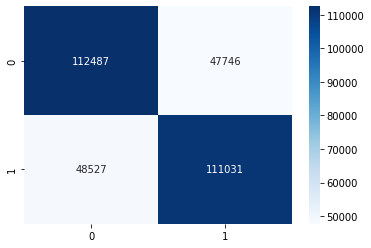

In [0]:
print_heatmap(y_true, y_pred)

4.2 CountVectorizer

In [0]:
y_true, y_pred, best_params = grid_search_hyperparameter_tuning(twitter_cv_df, regParams=[0.01, 0.05, 0.1], elasticNetParams=[0.2,0.6,0.8], tolParams=[1e-06, 1e-03],maxIter=20)

/databricks/spark/python/pyspark/sql/pandas/conversion.py:119: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field tf_features. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT()
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)
F1 Score: 0.7476271313411712 found with parameters regParam:0.01 and elasticNetParam:0.2
/databricks/spark/python/pyspark/sql/pandas/conversion.py:119: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field tf_features. If this column is not necessary, you may consider dropping it or converting to primitive ty

In [0]:
best_params

Out[44]: {'regParam': 0.01,
 'elasticNetParam': 0.2,
 'lrModel': LogisticRegressionModel: uid=LogisticRegression_6a45ac0b5d3a, numClasses=5, numFeatures=1000,
 'tolParam': 0.001}

In [0]:
best_params['lrModel'].save('./cv_best')

In [0]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.69      0.73    160233
         4.0       0.72      0.81      0.76    159558

    accuracy                           0.75    319791
   macro avg       0.75      0.75      0.75    319791
weighted avg       0.75      0.75      0.75    319791



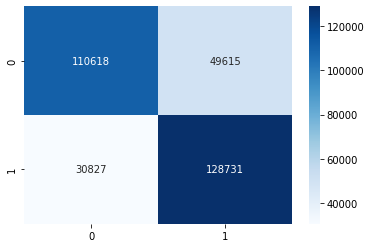

In [0]:
print_heatmap(y_true, y_pred)

4.3 HashingTF

In [0]:
y_true, y_pred, best_params = grid_search_hyperparameter_tuning(twitter_hash_df, regParams=[0.01, 0.05, 0.1], elasticNetParams=[0.2,0.6,0.8], tolParams=[1e-06, 1e-03],maxIter=20)

/databricks/spark/python/pyspark/sql/pandas/conversion.py:119: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field tf_features. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT()
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)
F1 Score: 0.647778733589187 found with parameters regParam:0.01 and elasticNetParam:0.2
/databricks/spark/python/pyspark/sql/pandas/conversion.py:119: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field tf_features. If this column is not necessary, you may consider dropping it or converting to primitive typ

In [0]:
best_params

Out[49]: {'regParam': 0.01,
 'elasticNetParam': 0.2,
 'lrModel': LogisticRegressionModel: uid=LogisticRegression_aacec13b9646, numClasses=5, numFeatures=200,
 'tolParam': 0.001}

In [0]:
best_params['lrModel'].save('./hashtf_best')

In [0]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.65      0.63      0.64    160233
         4.0       0.64      0.66      0.65    159558

    accuracy                           0.65    319791
   macro avg       0.65      0.65      0.65    319791
weighted avg       0.65      0.65      0.65    319791



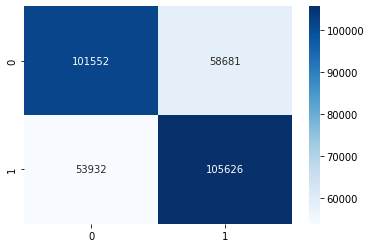

In [0]:
print_heatmap(y_true, y_pred)